# INF250 Assignment 1

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

### Task 1

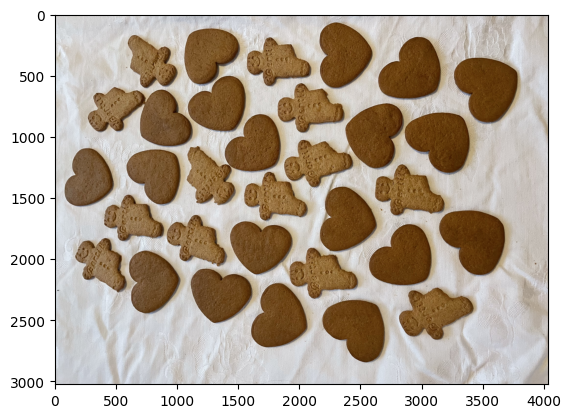

In [2]:
image = io.imread('gingerbread.jpg')
plt.imshow(image);

### Task 2

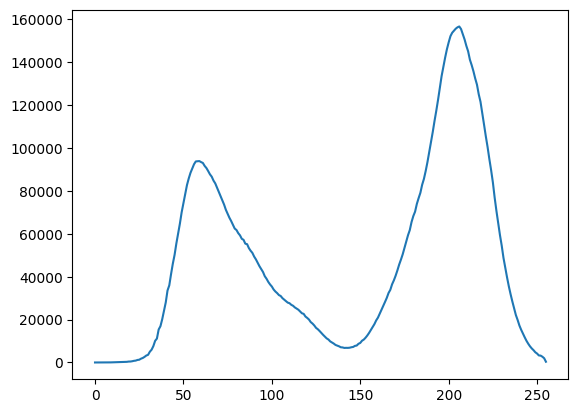

In [3]:
def histogram(image):
    shape = np.shape(image)
    histogram = np.zeros(256)

    if len(shape) == 3:
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    histogram = np.zeros(256)
    shape = np.shape(imagemean)
    for i in range(shape[0]):
        for j in range(shape[1]):
            pixval = int(imagemean[i,j])
            histogram[pixval] += 1

    return histogram

image.shape
image_red = image[:,:,0]
imagemean = image.mean(axis=2)

plt.figure()        
plt.plot(histogram(image))
plt.show()

### Task 3

In [4]:
def otsu(image):
    his, bins = np.histogram(image, bins=256, range=(0,256))
    num_pixels = np.sum(his)
    mean_weight = 1.0 / num_pixels

    th = -1
    final_value = -1

    for t in range(1, len(bins)-1):
        w0_count = np.sum(his[:t])
        w1_count = np.sum(his[t:])

        w0 = w0_count * mean_weight
        w1 = w1_count * mean_weight

        if w0_count == 0 or w1_count == 0:
            continue

        u0 = np.sum(np.arange(0, t) * his[:t]) / w0_count
        u1 = np.sum(np.arange(t, 256) * his[t:]) / w1_count

        value = w0 * w1 * (u0 - u1) ** 2

        if value > final_value:
            th = t
            final_value = value

    return th

print(otsu(image))

136


### Task 4

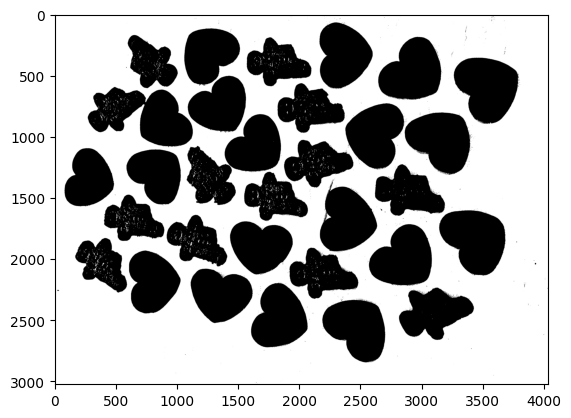

In [5]:
def threshold(image, th=None):
    shape = np.shape(image)
    binarised = np.zeros([shape[0], shape[1]], dtype=np.uint8)

    if len(shape) == 3:
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    if th is None:
        th = otsu(image)

    binarised = image.copy()
    binarised[binarised < th] = 0
    binarised[binarised >= th] = 255


    return binarised

binarised = threshold(image)
plt.imshow(binarised, cmap='gray');